In [1]:
import torch
import joblib
import pandas as pd
import numpy as np
import gzip
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# set device to gpu
device = (
"cuda"
if torch.cuda.is_available()
else "mps"
if torch.backends.mps.is_available()
else "cpu"
)
device

'cuda'

In [2]:
# Load the trained model and scaler

def load_model(model_path):
    with gzip.open(model_path, 'rb') as f:
        model = joblib.load(f)
    return model

def load_scaler(scaler_path):
    with gzip.open(scaler_path, 'rb') as f:
        scaler = joblib.load(f)
    return scaler

def preprocess_data(new_data, scaler_path, pca_path=None):
    scaler = load_scaler(scaler_path)
    new_data_scaled = scaler.transform(new_data)
    
    if pca_path:
        with gzip.open(pca_path, 'rb') as f:
            pca = joblib.load(f)
        new_data_scaled = pca.transform(new_data_scaled)
        
    return new_data_scaled

def classify_new_data(new_data, model_path, scaler_path, apply_pca=False):
    model = load_model(model_path)
    pca_path = scaler_path.replace("scaler", "pca_knn") if apply_pca else None
    preprocessed_data = preprocess_data(new_data, scaler_path, pca_path)
    predictions = model.predict(preprocessed_data)
    return predictions

Accuracy: 0.8769


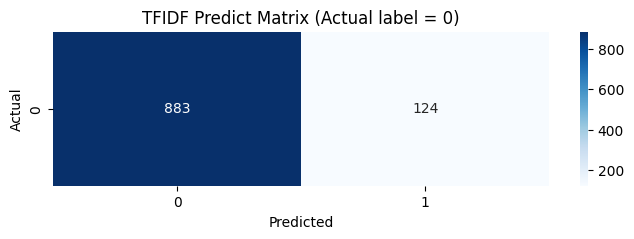

In [3]:
# TFIDF
breeze_tfidf_data_df = pd.read_csv('../Data/breeze_tfidf_vector.csv')
new_data = breeze_tfidf_data_df.iloc[:, 1:-1].values
# assume 0
true_labels = np.zeros(len(new_data))

model_path = '../Data/Model/tfidf_knn_10fold_model.pth.gz'
scaler_path = '../Data/Model/tfidf_10fold_scaler.pkl.gz'

predictions = classify_new_data(new_data, model_path, scaler_path, apply_pca=True)

# accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.4f}')

# confusion matrix
cm = confusion_matrix(true_labels, predictions)
cm_actual_0 = cm[0].reshape(1, -1)

# show confusion matrix
plt.figure(figsize=(8, 2))
sns.heatmap(cm_actual_0, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0'])
plt.title('TFIDF Predict Matrix (Actual label = 0)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7200


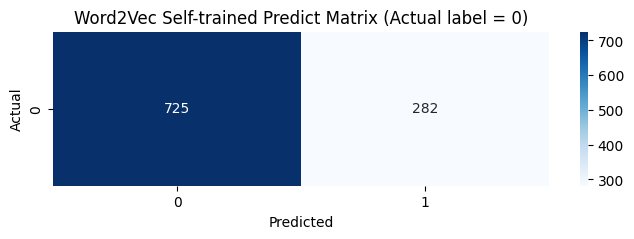

In [4]:
# Word2Vec Self-trained
breeze_word2vec_selftrain_data_df = pd.read_csv('../Data/breeze_word2vec_vector_selftrain.csv')
new_data = breeze_word2vec_selftrain_data_df.iloc[:, 1:-1].values
# assume 0
true_labels = np.zeros(len(new_data))

model_path = '../Data/Model/word2vec_selftrain_knn_10fold_model.pth.gz'
scaler_path = '../Data/Model/word2vec_selftrain_10fold_scaler.pkl.gz'

predictions = classify_new_data(new_data, model_path, scaler_path)

# accuracy
accuracy = accuracy_score(true_labels, predictions)

print(f'Accuracy: {accuracy:.4f}')

# confusion matrix
cm = confusion_matrix(true_labels, predictions)

cm_actual_0 = cm[0].reshape(1, -1)

# show confusion matrix
plt.figure(figsize=(8, 2))
sns.heatmap(cm_actual_0, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0'])
plt.title('Word2Vec Self-trained Predict Matrix (Actual label = 0)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5909


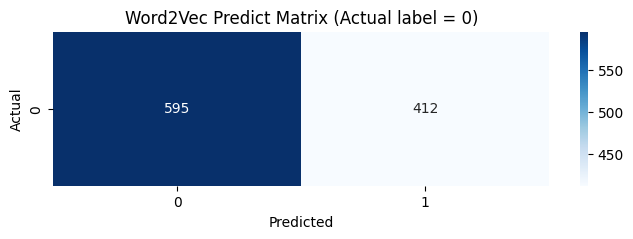

In [5]:
# Word2Vec
breeze_word2vec_data_df = pd.read_csv('../Data/breeze_word2vec_vector.csv')
new_data = breeze_word2vec_data_df.iloc[:, 1:-1].values

true_labels = np.zeros(len(new_data))

model_path = '../Data/Model/word2vec_knn_10fold_model.pth.gz'
scaler_path = '../Data/Model/word2vec_10fold_scaler.pkl.gz'

predictions = classify_new_data(new_data, model_path, scaler_path)

# accuracy
accuracy = accuracy_score(true_labels, predictions)

print(f'Accuracy: {accuracy:.4f}')

# confusion matrix
cm = confusion_matrix(true_labels, predictions)

cm_actual_0 = cm[0].reshape(1, -1)

# show confusion matrix
plt.figure(figsize=(8, 2))
sns.heatmap(cm_actual_0, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0'])
plt.title('Word2Vec Predict Matrix (Actual label = 0)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.0149


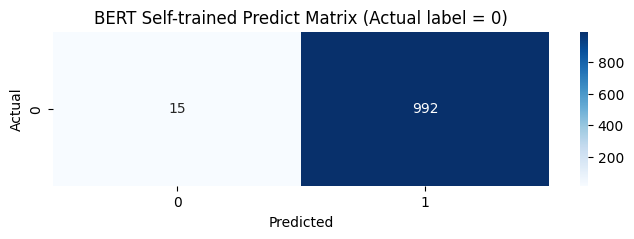

In [8]:
# BERT Self-trained
breeze_bert_selftrain_data_df = pd.read_csv('../Data/breeze_bert_vector_self_train.csv')
new_data = breeze_bert_selftrain_data_df.iloc[:, :-1].values

true_labels = np.zeros(len(new_data))

model_path = '../Data/Model/bert_selftrain_knn_10fold_model.pth.gz'
scaler_path = '../Data/Model/bert_selftrain_10fold_scaler.pkl.gz'

predictions = classify_new_data(new_data, model_path, scaler_path)

# accuracy
accuracy = accuracy_score(true_labels, predictions)

print(f'Accuracy: {accuracy:.4f}')

# confusion matrix
cm = confusion_matrix(true_labels, predictions)

cm_actual_0 = cm[0].reshape(1, -1)

# show confusion matrix
plt.figure(figsize=(8, 2))
sns.heatmap(cm_actual_0, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0'])
plt.title('BERT Self-trained Predict Matrix (Actual label = 0)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8918


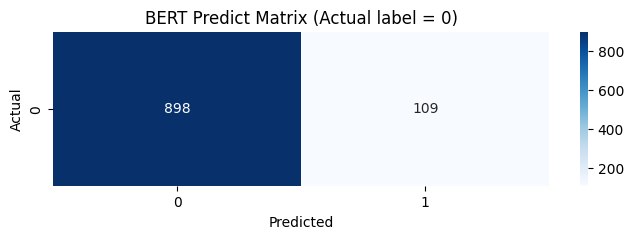

In [7]:
# BERT
breeze_bert_data_df = pd.read_csv('../Data/breeze_bert_vector.csv')
new_data = breeze_bert_data_df.iloc[:, :-1].values

true_labels = np.zeros(len(new_data))

model_path = '../Data/Model/bert_knn_10fold_model.pth.gz'
scaler_path = '../Data/Model/bert_10fold_scaler.pkl.gz'

predictions = classify_new_data(new_data, model_path, scaler_path)

true_labels = np.zeros(len(new_data))

# accuracy
accuracy = accuracy_score(true_labels, predictions)

print(f'Accuracy: {accuracy:.4f}')

# confusion matrix
cm = confusion_matrix(true_labels, predictions)

cm_actual_0 = cm[0].reshape(1, -1)

# show confusion matrix
plt.figure(figsize=(8, 2))
sns.heatmap(cm_actual_0, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0'])
plt.title('BERT Predict Matrix (Actual label = 0)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()